In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
y
y
y
y
y
y
y
y
y
y
y

  Successfully uninstalled tensorflow-2.15.0


In [ ]:
!pip install tensorflow==2.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing insta

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
# import some basic linbrary
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset=pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide the dataset into independent features and dependent fea tures
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
# Feature engineering
geography = pd.get_dummies(X['Geography'],drop_first = True)
gender = pd.get_dummies(X['Gender'],drop_first =True)

In [ ]:
##concatinate these variablles with dataframe
X = X.drop(['Geography','Gender'],axis=1)

In [ ]:
X = pd.concat([X,geography,gender],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False,False,True,False


In [ ]:
#splitting the trainingset and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a new instance of the StandardScaler class
sc_X = StandardScaler()

# Fit the scaler on the training set
X_train = sc_X.fit_transform(X_train)

# Transform the test set using the fitted scaler
X_test = sc_X.transform(X_test)

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
## Now we create a ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [ ]:
## Lets initializwe ann
classifier = Sequential()

In [ ]:
## Adding Input Layer
classifier.add(Dense(units=11,activation ='relu'))

In [ ]:
# adding First hidden layer
classifier.add(Dense(units=7,activation ='relu'))

In [ ]:
#adding Second hidden layer
classifier.add(Dense(units=6,activation ='relu'))

In [ ]:
## Adding output layer
classifier.add(Dense(1,activation ='sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# For adding own learmimg rate  use this code and change optimizer value to optin abouve cell
# import tensorflow
# opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [ ]:
#Early stopping is occur when our accuracy is not increasing
import tensorflow as tf
early_Stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
    )

In [ ]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_Stopping)

Epoch 1/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3258 - accuracy: 0.8671 - val_loss: 0.3572 - val_accuracy: 0.8569
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3282 - accuracy: 0.8625 - val_loss: 0.3530 - val_accuracy: 0.8565
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.8660 - val_loss: 0.3530 - val_accuracy: 0.8565
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3265 - accuracy: 0.8658 - val_loss: 0.3546 - val_accuracy: 0.8576
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3264 - accuracy: 0.8653 - val_loss: 0.3604 - val_accuracy: 0.8489
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.8642 - val_loss: 0.3572 - val_accuracy: 0.8554
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3266 - accuracy: 0.8615 - val_loss: 0.3565 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

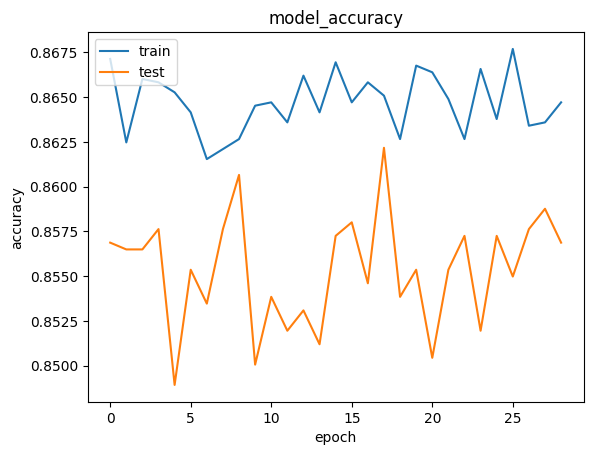

In [ ]:
## Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
##Part 3 - Making the predictrion and evaluating the model

# Predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
## MAke the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1492,  103],
       [ 186,  219]])

In [ ]:
#calculare the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [ ]:
score

0.8555

In [ ]:
classifier.get_weights()

[array([[ 0.00216932, -0.00317471, -0.15588729, -0.13842611,  0.5027968 ,
          0.17087811],
        [-0.30503324,  0.3374615 , -0.70565385,  0.7954761 , -0.10358094,
         -0.65501153],
        [ 0.04742195, -0.0243369 , -0.09352682,  0.03165213, -0.17485526,
          0.3817904 ],
        [-0.14288713, -0.33210152,  0.06075128, -0.19563787, -0.12495734,
         -0.85322124],
        [-0.47622696, -1.5621591 , -0.836252  , -0.7364729 , -0.26758918,
         -0.5789578 ],
        [ 0.0226673 ,  0.0089634 , -0.06944665,  0.05462587,  0.6183491 ,
         -0.2775917 ],
        [ 0.03996749, -0.19014382, -0.13311131,  1.1472706 ,  0.29184482,
          0.43406954],
        [-0.05223531,  0.09253109, -0.02100324,  0.05029721,  0.5733997 ,
          0.00392208],
        [-0.991039  ,  0.3071463 ,  0.15443335, -0.2866972 ,  0.24975367,
          0.15122129],
        [ 0.105486  , -0.06431329, -0.9675052 , -0.28590658, -0.3458934 ,
         -0.1033776 ],
        [-0.4572573 , -0.30670